# **DETECCIÓN DE LETRAS DEL ABECEDARIO DEL LENGUAJE DE SEÑAS COLOMBIANO (LSC)**

<img src="https://github.com/afxmejia02/DetectorLSC-ProyectoIA/raw/main/multimedia/Banner.png">


# **Problematica:**

Segun DANE en 2021 existian 459.784 personas sordas en el pais. Personas que tienen una clara dificultad en su comunicacion debido al bajo conocimineto colectivo de este lenguaje. Impidiendoles tener una vida normal como ir a la escuela. **Segun INSOR (Instituto Nacional para Sordos)** cifras del SIMAT con corte a marzo de 2019, se estima que aproximadamente **11%** de
las personas con discapacidad auditiva en edad escolar (entre 5 y 16 años) estarían matriculadas en algún colegio. Esta es una de tantas problematicas que pueden una persona con discapacidad en la comunicacion. Citas medicas, derecho a votar, derecho a opinar y mas, pueden ser batallas a las qeu se enfrentan diariamente.

**Dataset LSC Modelo**

El Dataset de Lenguaje de Señas Colombiano es una colección de imágenes que representa las letras del abecedario en el lenguaje de señas colombiano (LSC). Estas imágenes son una valiosa herramienta para el aprendizaje y la investigación en el campo de la comunicación inclusiva y la lengua de señas

Enlace del repositorio del dataset: https://www.kaggle.com/datasets/oscarstep/dataset-lsc-modelo

#**CREACION DEL DATASET**




In [1]:
#@title  **Cargamos el drive del proyecto**
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**EXPLORACION DE LOS DATOS**



In [2]:
#@title **Importamos todas las librerias a utilizar**
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Conv2D, MaxPooling2D
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing import image
import json

# **Data augmentation**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=[0.8, 1.2],
    horizontal_flip=False,
    fill_mode='nearest'
)

from keras.preprocessing import image
import numpy as np

letras = ["a", "b", "c", "d", "e", "f", "i", "k", "l", "m", "n", "o", "p", "q", "r", "t", "u", "v", "w", "x", "y"]
for letra in letras:
  img_path = '/content/drive/MyDrive/AI2_PROJECT/Lenguaje_Senas_Images/'+letra+'/'+letra+'_001.jpg'
  img = image.load_img(img_path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  i = 0
  for batch in datagen.flow(x, batch_size=1, save_to_dir='/content/drive/MyDrive/AI2_PROJECT/Lenguaje_Senas_Images/'+letra, save_prefix='aug', save_format='png'):
      i += 1
      if i > 500:
        print(letra + " " + str(i))
        break


a 501
b 501
c 501
d 501
e 501
f 501
i 501
k 501
l 501
m 501
n 501
o 501
p 501
q 501
r 501
t 501
u 501
v 501
w 501
x 501
y 501


# **Cargamos las imágenes**

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

batch_size = 32
img_height = 224
img_width = 224
data_dir = "/content/drive/MyDrive/AI2_PROJECT/Lenguaje_Senas_Images/"

# Obtener la lista de clases (nombre de las carpetas en data_dir)
class_names = sorted(os.listdir(data_dir))
print("Clases encontradas:", class_names)

# Contar las imágenes por clase en el directorio
class_counts = {}
for class_name in class_names:
    dir_path = os.path.join(data_dir, class_name)
    num_images = len(os.listdir(dir_path))
    class_counts[class_name] = num_images

print("\nCantidad de imágenes por clase:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")


Clases encontradas: ['a', 'b', 'c', 'd', 'e', 'f', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 't', 'u', 'v', 'w', 'x', 'y']

Cantidad de imágenes por clase:
a: 1145
b: 1145
c: 1145
d: 1145
e: 1145
f: 1145
i: 1145
k: 1145
l: 1145
m: 1145
n: 1145
o: 1145
p: 1145
q: 1145
r: 1145
t: 1145
u: 1145
v: 1145
w: 1145
x: 1145
y: 1145


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

batch_size = 32
img_height = 224
img_width = 224
data_dir = "/content/drive/MyDrive/AI2_PROJECT/Lenguaje_Senas_Images/"

train_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 24045 files belonging to 21 classes.
Using 19236 files for training.
Found 24045 files belonging to 21 classes.
Using 4809 files for validation.


In [ ]:
class_names = train_dataset.class_names
print(class_names)

['a', 'b', 'c', 'd', 'e', 'f', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 't', 'u', 'v', 'w', 'x', 'y']


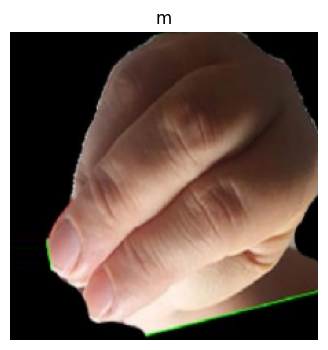

In [ ]:
def plot_images(dataset, class_names):
    plt.figure(figsize=(4, 4))
    for images, labels in dataset.take(5):
        for i in range(1):
            ax = plt.subplot(1, 1, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")


plot_images(train_dataset, class_names)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)
print(train_dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


# **Modelo ResNet50V2 - (Sin dropout y congelando pesos)**

In [ ]:
base_model = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False)

for layer in base_model.layers:
    layer.trainable = False

94668760/94668760 [==============================] - 1s 0us/step


In [ ]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(len(list(np.unique(class_names))), activation='softmax')(x)


model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/AI2_PROJECT/ResNet50V2_Con_Dropout.h5')

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join('/content/drive/MyDrive/AI2_PROJECT/', 'best_model.h5'),
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

In [ ]:
history = model.fit(train_dataset, epochs=10, batch_size=32,validation_data=val_dataset, callbacks=[checkpoint])

Epoch 1/10
362/362 [==============================] - ETA: 0s - loss: 16.5779 - accuracy: 0.5729
Epoch 1: val_accuracy improved from -inf to 0.74845, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


362/362 [==============================] - 1902s 5s/step - loss: 16.5779 - accuracy: 0.5729 - val_loss: 1.5183 - val_accuracy: 0.7484
Epoch 2/10
362/362 [==============================] - ETA: 0s - loss: 1.3007 - accuracy: 0.7240
Epoch 2: val_accuracy improved from 0.74845 to 0.75777, saving model to best_model.h5
362/362 [==============================] - 43s 120ms/step - loss: 1.3007 - accuracy: 0.7240 - val_loss: 0.9995 - val_accuracy: 0.7578
Epoch 3/10
362/362 [==============================] - ETA: 0s - loss: 0.9479 - accuracy: 0.7627
Epoch 3: val_accuracy did not improve from 0.75777
362/362 [==============================] - 39s 109ms/step - loss: 0.9479 - accuracy: 0.7627 - val_loss: 0.9259 - val_accuracy: 0.7560
Epoch 4/10
362/362 [==============================] - ETA: 0s - loss: 0.8252 - accuracy: 0.7828
Epoch 4: val_accuracy improved from 0.75777 to 0.77989, saving model to best_model.h5
362/362 [==============================] - 40s 111ms/step - loss: 0.8252 - accuracy: 0.

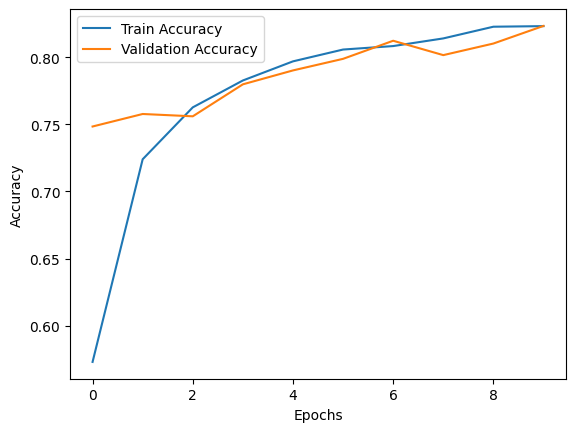

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
history_dict = history.history
path = os.path.join('/content/drive/MyDrive/AI2_PROJECT/', 'history_ResNet50V2_Sin_Dropout.json')

if os.path.exists(path):
    with open(path, 'r') as f:
        existing_data = json.load(f)
else:
    existing_data = {}

for key, value in history_dict.items():
    if key in existing_data:
        existing_data[key].extend(value)
    else:
        existing_data[key] = value

with open(path, 'w') as f:
    json.dump(existing_data, f)

# **Modelo ResNet50V2 - (Con dropout y congelando pesos)**

In [ ]:
base_model = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False)

for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(460, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(460, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
predictions = tf.keras.layers.Dense(len(list(np.unique(class_names))), activation='softmax')(x)


model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join('/content/drive/MyDrive/AI2_PROJECT/', 'ResNet50V2_Con_Dropout.h5'),
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

In [ ]:
history = model.fit(train_dataset, epochs=10, batch_size=32,validation_data=val_dataset, callbacks=[checkpoint])

Epoch 1/10
362/362 [==============================] - ETA: 0s - loss: 2.6431 - accuracy: 0.1490
Epoch 1: val_accuracy did not improve from 0.20422
362/362 [==============================] - 40s 110ms/step - loss: 2.6431 - accuracy: 0.1490 - val_loss: 2.5273 - val_accuracy: 0.1621
Epoch 2/10
362/362 [==============================] - ETA: 0s - loss: 2.6312 - accuracy: 0.1528
Epoch 2: val_accuracy did not improve from 0.20422
362/362 [==============================] - 39s 109ms/step - loss: 2.6312 - accuracy: 0.1528 - val_loss: 2.5368 - val_accuracy: 0.1496
Epoch 3/10
362/362 [==============================] - ETA: 0s - loss: 2.6617 - accuracy: 0.1436
Epoch 3: val_accuracy did not improve from 0.20422
362/362 [==============================] - 39s 109ms/step - loss: 2.6617 - accuracy: 0.1436 - val_loss: 2.4941 - val_accuracy: 0.1662
Epoch 4/10
362/362 [==============================] - ETA: 0s - loss: 2.7061 - accuracy: 0.1322
Epoch 4: val_accuracy did not improve from 0.20422
362/362 [=

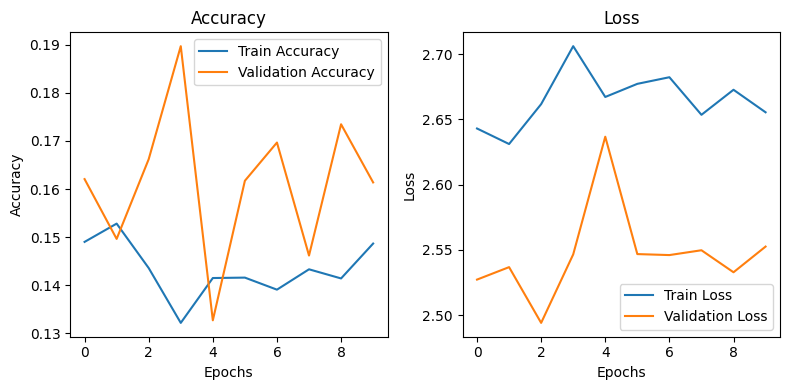

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy')
ax1.legend()

ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_title('Loss')
ax2.legend()


plt.tight_layout()

plt.show()


In [ ]:
history_dict = history.history
path = os.path.join('/content/drive/MyDrive/AI2_PROJECT/', 'history_ResNet50V2_Con_Dropout.json')

if os.path.exists(path):
    with open(path, 'r') as f:
        existing_data = json.load(f)
else:
    existing_data = {}

for key, value in history_dict.items():
    if key in existing_data:
        existing_data[key].extend(value)
    else:
        existing_data[key] = value

with open(path, 'w') as f:
    json.dump(existing_data, f)

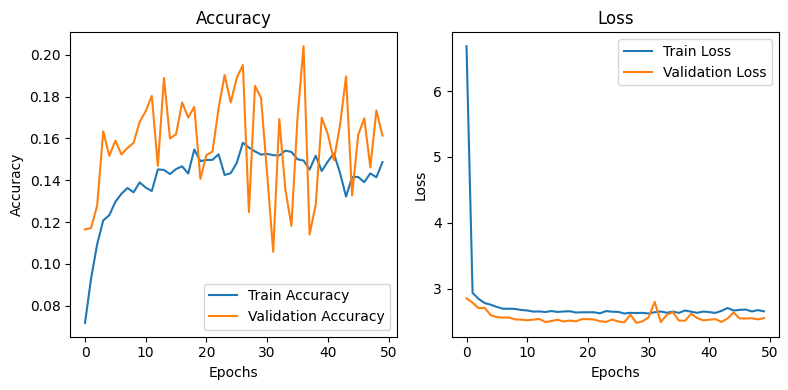

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))


ax1.plot(existing_data['accuracy'], label='Train Accuracy')
ax1.plot(existing_data['val_accuracy'], label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy')
ax1.legend()

ax2.plot(existing_data['loss'], label='Train Loss')
ax2.plot(existing_data['val_loss'], label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_title('Loss')
ax2.legend()

plt.tight_layout()

plt.show()


# **Modelo ResNet50V2 - (Con dropout menor y congelando pesos)**

In [ ]:
base_model = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False)

for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(1240, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
predictions = tf.keras.layers.Dense(len(list(np.unique(class_names))), activation='softmax')(x)


model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join('/content/drive/MyDrive/AI2_PROJECT/', 'ResNet50V2_Con_Dropout_menor.h5'),
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

In [ ]:
history = model.fit(train_dataset, epochs=10, batch_size=32,validation_data=val_dataset, callbacks=[checkpoint])

Epoch 1/10
362/362 [==============================] - ETA: 0s - loss: 0.9601 - accuracy: 0.7038
Epoch 1: val_accuracy did not improve from 0.77194
362/362 [==============================] - 40s 111ms/step - loss: 0.9601 - accuracy: 0.7038 - val_loss: 0.7009 - val_accuracy: 0.7699
Epoch 2/10
362/362 [==============================] - ETA: 0s - loss: 0.9633 - accuracy: 0.7023
Epoch 2: val_accuracy improved from 0.77194 to 0.77367, saving model to /content/drive/MyDrive/AI2_PROJECT/ResNet50V2_Con_Dropout_menor.h5
362/362 [==============================] - 97s 268ms/step - loss: 0.9633 - accuracy: 0.7023 - val_loss: 0.7456 - val_accuracy: 0.7737
Epoch 3/10
362/362 [==============================] - ETA: 0s - loss: 0.9583 - accuracy: 0.7041
Epoch 3: val_accuracy did not improve from 0.77367
362/362 [==============================] - 40s 111ms/step - loss: 0.9583 - accuracy: 0.7041 - val_loss: 0.7382 - val_accuracy: 0.7723
Epoch 4/10
362/362 [==============================] - ETA: 0s - loss:

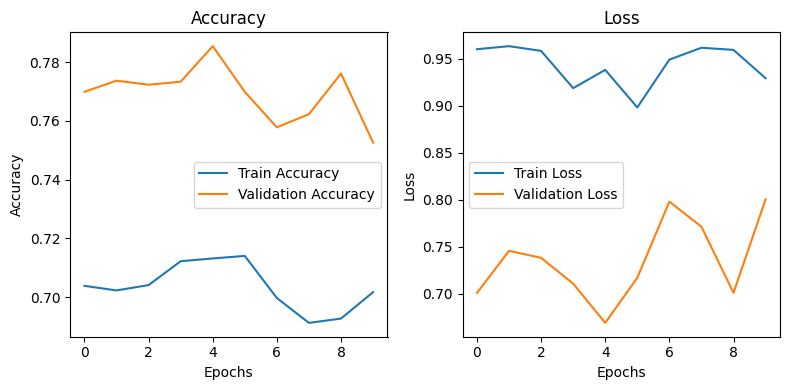

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy')
ax1.legend()

ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_title('Loss')
ax2.legend()


plt.tight_layout()

plt.show()


In [ ]:
history_dict = history.history
path = os.path.join('/content/drive/MyDrive/AI2_PROJECT/', 'history_ResNet50V2_Con_Dropout_menor.json')

if os.path.exists(path):
    with open(path, 'r') as f:
        existing_data = json.load(f)
else:
    existing_data = {}

for key, value in history_dict.items():
    if key in existing_data:
        existing_data[key].extend(value)
    else:
        existing_data[key] = value

with open(path, 'w') as f:
    json.dump(existing_data, f)

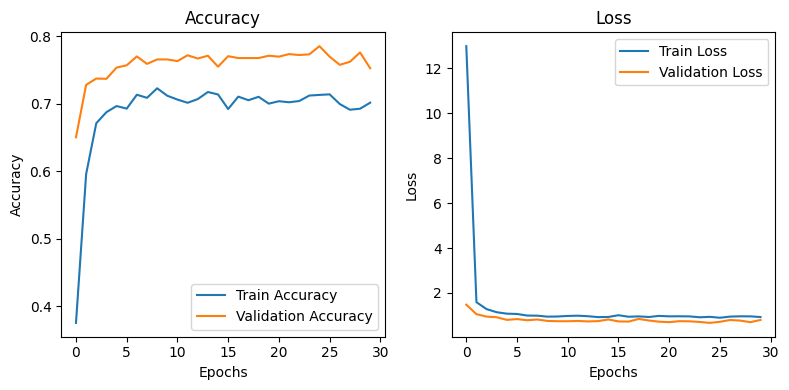

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))


ax1.plot(existing_data['accuracy'], label='Train Accuracy')
ax1.plot(existing_data['val_accuracy'], label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy')
ax1.legend()

ax2.plot(existing_data['loss'], label='Train Loss')
ax2.plot(existing_data['val_loss'], label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_title('Loss')
ax2.legend()

plt.tight_layout()

plt.show()


# **Modelo VGG19**

In [ ]:
base_model_VGG19 = tf.keras.applications.VGG19(weights='imagenet')

for layer in base_model_VGG19.layers:
    layer.trainable = False

base_model_VGG19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
x = base_model_VGG19.output
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(1240, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
predictions = tf.keras.layers.Dense(len(list(np.unique(class_names))), activation='softmax')(x)


model_VGG19 = tf.keras.Model(inputs=base_model_VGG19.input, outputs=predictions)

In [ ]:
model_VGG19.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_VGG19.fit(train_dataset, epochs=10, batch_size=32,validation_data=val_dataset)

Epoch 1/10
607/607 [==============================] - 155s 221ms/step - loss: 1.0904 - accuracy: 0.7890 - val_loss: 0.5758 - val_accuracy: 0.8637
Epoch 2/10
607/607 [==============================] - 128s 210ms/step - loss: 0.5405 - accuracy: 0.8683 - val_loss: 0.4657 - val_accuracy: 0.8779
Epoch 3/10
607/607 [==============================] - 129s 212ms/step - loss: 0.4478 - accuracy: 0.8847 - val_loss: 0.4082 - val_accuracy: 0.8874
Epoch 4/10
607/607 [==============================] - 143s 235ms/step - loss: 0.3934 - accuracy: 0.8926 - val_loss: 0.3679 - val_accuracy: 0.8959
Epoch 5/10
607/607 [==============================] - 129s 210ms/step - loss: 0.3497 - accuracy: 0.9024 - val_loss: 0.3371 - val_accuracy: 0.9031
Epoch 6/10
607/607 [==============================] - 129s 210ms/step - loss: 0.3203 - accuracy: 0.9093 - val_loss: 0.3151 - val_accuracy: 0.9068
Epoch 7/10
607/607 [==============================] - 136s 223ms/step - loss: 0.2922 - accuracy: 0.9148 - val_loss: 0.2972 -

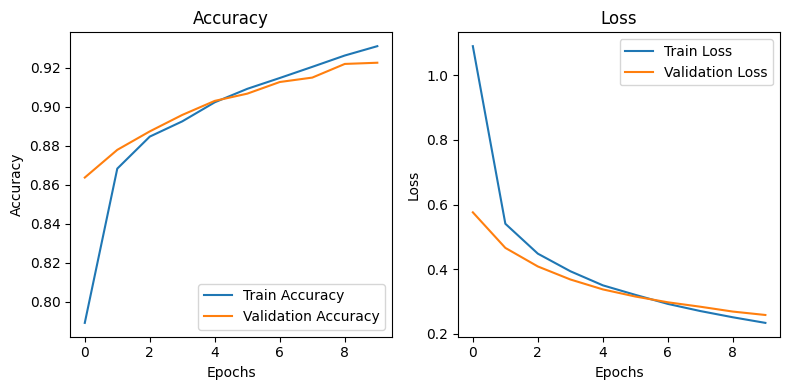

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))


ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy')
ax1.legend()

ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_title('Loss')
ax2.legend()

plt.tight_layout()

plt.show()

# **Mejor modelo**
# **Modelo VGG19 - (con más epochs)**

In [ ]:
x = base_model_VGG19.output
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(1240, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
predictions = tf.keras.layers.Dense(len(list(np.unique(class_names))), activation='softmax')(x)


model_VGG19_epochs = tf.keras.Model(inputs=base_model_VGG19.input, outputs=predictions)

In [ ]:
model_VGG19_epochs.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_VGG19_epochs.fit(train_dataset, epochs=35, batch_size=32,validation_data=val_dataset)

Epoch 1/35
607/607 [==============================] - 131s 210ms/step - loss: 1.0914 - accuracy: 0.7909 - val_loss: 0.5728 - val_accuracy: 0.8635
Epoch 2/35
607/607 [==============================] - 129s 212ms/step - loss: 0.5376 - accuracy: 0.8680 - val_loss: 0.4646 - val_accuracy: 0.8796
Epoch 3/35
607/607 [==============================] - 128s 210ms/step - loss: 0.4448 - accuracy: 0.8840 - val_loss: 0.4071 - val_accuracy: 0.8905
Epoch 4/35
607/607 [==============================] - 129s 210ms/step - loss: 0.3903 - accuracy: 0.8948 - val_loss: 0.3712 - val_accuracy: 0.8936
Epoch 5/35
607/607 [==============================] - 143s 234ms/step - loss: 0.3489 - accuracy: 0.9025 - val_loss: 0.3405 - val_accuracy: 0.9012
Epoch 6/35
607/607 [==============================] - 129s 211ms/step - loss: 0.3168 - accuracy: 0.9090 - val_loss: 0.3184 - val_accuracy: 0.9074
Epoch 7/35
607/607 [==============================] - 130s 212ms/step - loss: 0.2905 - accuracy: 0.9141 - val_loss: 0.2961 -

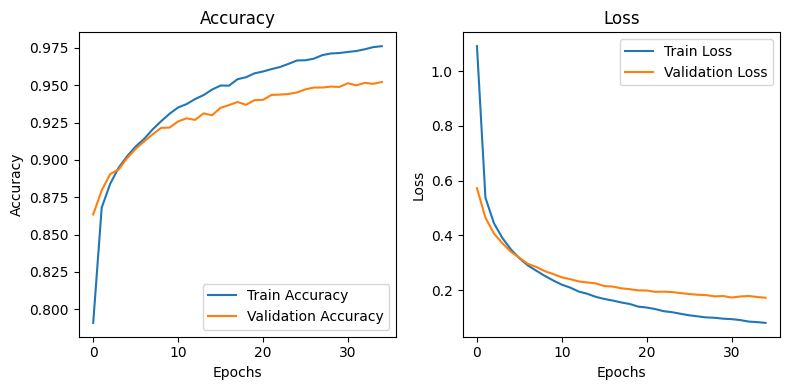

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))


ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy')
ax1.legend()

ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_title('Loss')
ax2.legend()

plt.tight_layout()

plt.show()

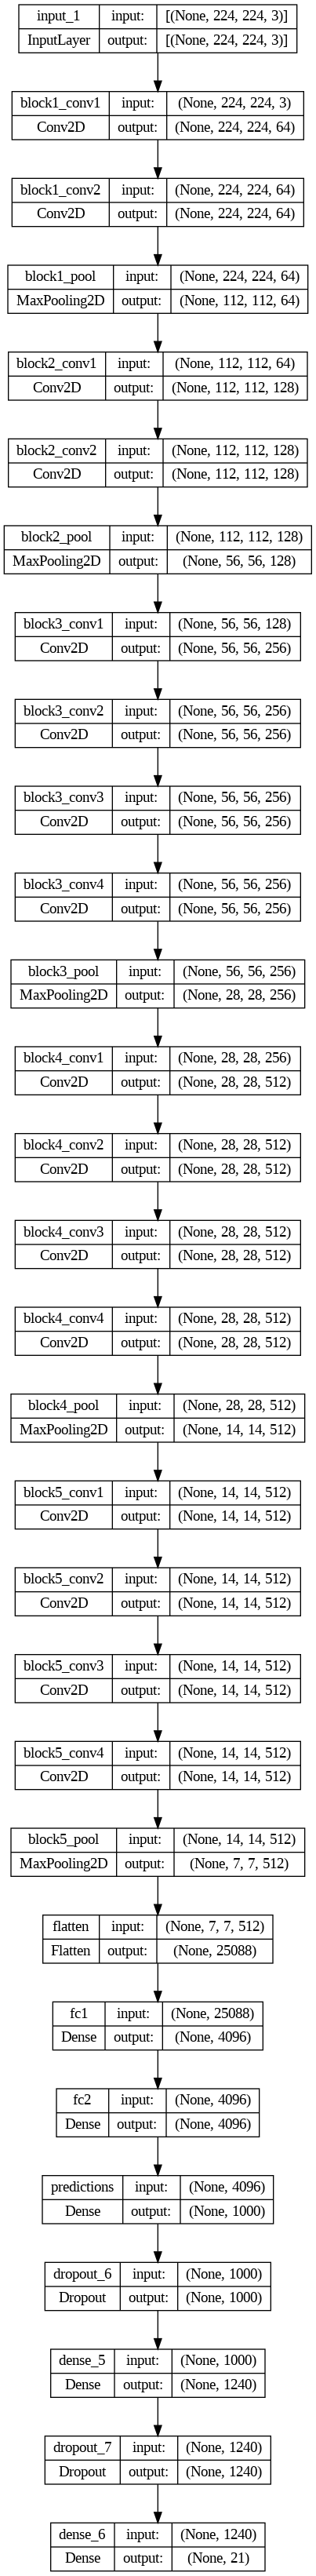

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_VGG19_epochs, to_file='modelo_cnn.png', show_shapes=True)

In [ ]:
model_VGG19_epochs.save('/content/drive/MyDrive/AI2_PROJECT/model_vgg19.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Predicciones**

In [ ]:
model_final = tf.keras.models.load_model('/content/drive/MyDrive/AI2_PROJECT/model_vgg19.h5')

In [ ]:
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 't', 'u', 'v', 'w', 'x', 'y']

# Función para obtener la letra correspondiente a la predicción
def get_letter_from_prediction(prediction):
    index = np.argmax(prediction)
    return letters[index]

def apply_mask_and_threshold(img_array):
    mask = np.zeros((224, 224, 3), dtype=np.float32)
    mask[50:200, 50:200] = 1
    mask_inverse = 1 - mask
    img_masked = img_array[0] * mask
    img_gray = cv2.cvtColor(img_masked.astype('uint8'), cv2.COLOR_RGB2GRAY)
    _, img_thresholded = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
    img_thresholded_rgb = cv2.cvtColor(img_thresholded, cv2.COLOR_GRAY2RGB)
    img_thresholded_rgb = img_thresholded_rgb.astype(float) + (mask_inverse * 255)
    img_thresholded_rgb = img_thresholded_rgb.astype('uint8')
    img_thresholded_rgb = cv2.bitwise_not(img_thresholded_rgb)

    return img_thresholded_rgb


def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    #img_array /= 255.0
    return img_array


def predict_images_in_folder(model, folder_path, target_size=(224, 224),max_images=10):
    predictions = {}
    count = 0
    for filename in os.listdir(folder_path):
       if count >= max_images:
            break
       if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(folder_path, filename)
            img_array = preprocess_image(img_path, target_size)
            img_thresholded_rgb = apply_mask_and_threshold(img_array)
            img_thresholded_rgb = np.expand_dims(img_thresholded_rgb, axis=0)
            prediction = model.predict(img_thresholded_rgb)
            predicted_class = np.argmax(prediction, axis=1)
            predicted_class = get_letter_from_prediction(predicted_class)
            predictions[filename] = predicted_class
            count += 1
    return predictions


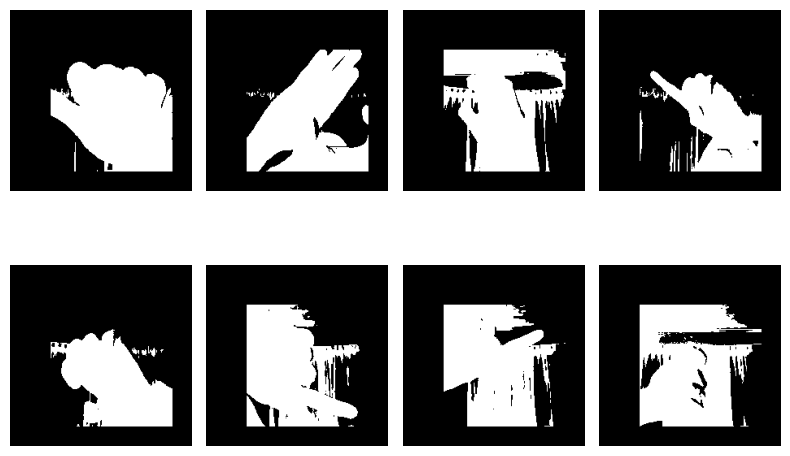

In [ ]:
#APLICANDO LA SEGMENTACION PARA CADA SEGMENTACION

img_paths = [
    '/content/drive/MyDrive/AI2_PROJECT/Lenguaje_Señas_Predicciones/Imagenes/a/a_julian_1.jpg',
    '/content/drive/MyDrive/AI2_PROJECT/Lenguaje_Señas_Predicciones/Imagenes/b/b_julian_1.jpg',
    '/content/drive/MyDrive/AI2_PROJECT/Lenguaje_Señas_Predicciones/Imagenes/c/c_julian_1.jpg',
    '/content/drive/MyDrive/AI2_PROJECT/Lenguaje_Señas_Predicciones/Imagenes/d/d_julian_1.jpg',
    '/content/drive/MyDrive/AI2_PROJECT/Lenguaje_Señas_Predicciones/Imagenes/e/e_julian_1.jpg',
    '/content/drive/MyDrive/AI2_PROJECT/Lenguaje_Señas_Predicciones/Imagenes/f/f_julian_1.jpg',
    '/content/drive/MyDrive/AI2_PROJECT/Lenguaje_Señas_Predicciones/Imagenes/i/i_julian_1.jpg',
    '/content/drive/MyDrive/AI2_PROJECT/Lenguaje_Señas_Predicciones/Imagenes/x/x_julian_1.jpg',
]

num_images = len(img_paths)


fig, axes = plt.subplots(2, 4, figsize=(8, 6))

for i in range(num_images):
  img_path = img_paths[i]
  img_array = preprocess_image(img_path, target_size=(224, 224))
  img_masked_rgb = apply_mask_and_threshold(img_array)
  axes[i // 4, i % 4].imshow(img_masked_rgb / 255)
  axes[i // 4, i % 4].axis('off')


plt.tight_layout()
plt.show()

In [ ]:
base_folder_path = '/content/drive/MyDrive/AI2_PROJECT/Lenguaje_Señas_Predicciones/Imagenes/'
letras = ['a', 'b', 'c', 'd', 'e', 'f', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 't', 'u', 'v', 'w', 'x', 'y']

# Iterar sobre cada letra
for letra in letras:
 folder_path = os.path.join(base_folder_path, letra)
 if not os.path.exists(folder_path):
    print(f"La carpeta {letra} no existe.")
 else:
    predictions = predict_images_in_folder(model_final, folder_path, target_size=(224, 224), max_images=1)
    for filename, prediction in predictions.items():
        print(f"Imagen: {filename}, Predicción: {prediction}")


1/1 [==============================] - 1s 1s/step
Imagen: a_julian_0.jpg, Predicción: a
1/1 [==============================] - 1s 1s/step
Imagen: b_julian_0.jpg, Predicción: a
1/1 [==============================] - 1s 721ms/step
Imagen: c_julian_0.jpg, Predicción: a
1/1 [==============================] - 1s 713ms/step
Imagen: d_julian_0.jpg, Predicción: a
1/1 [==============================] - 1s 1s/step
Imagen: e_julian_0.jpg, Predicción: a
1/1 [==============================] - 1s 1s/step
Imagen: f_julian_0.jpg, Predicción: a
1/1 [==============================] - 1s 1s/step
Imagen: i_julian_68.jpg, Predicción: a
1/1 [==============================] - 1s 1s/step
Imagen: k_julian_165.jpg, Predicción: a
1/1 [==============================] - 1s 1s/step
Imagen: l_julian_50.jpg, Predicción: a
1/1 [==============================] - 1s 786ms/step
Imagen: m_julian_82.jpg, Predicción: a
1/1 [==============================] - 1s 709ms/step
Imagen: n_julian_94.jpg, Predicción: a
1/1 [=========